Yahoo! Finance has changed slightly their structure (Not supporting DataReader()). Now requires headers for the data retreival on the http request. Once done works fine.
For pandas & pandas-datareader which you'll need to upgrade them if you use it. (Which has been already sorted). Probably on all other packages using data from yahoo! such backtrader, etc, you'll need either upgrade or add headers on the yahoo! script to retrieve data :).

pip install --upgrade pandas
pip install --upgrade pandas-datareader


import pandas as pd
import requests
link = 'https://finance.yahoo.com/quote/GOOG/history?period1=1420065000&period2=1609453799&interval=1d&frequency=1d&filter=history'
r = requests.get(link, headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
pandas_data = pd.read_html(r.text)
print(pandas_data)




In [1]:
import pandas as pd
import pandas_datareader.data as web
import requests
import datetime
##!pip install yfinance
#!pip install fix_yahoo_finance
import yfinance as yf
%matplotlib inline

yf.pdr_override()

In [6]:
# 用 yahoo finance 
start = datetime.datetime(2016, 9, 1)
end = datetime.datetime(2017, 1, 10)
# 台灣股市的話要用 股票代號 加上 .TW
link = 'https://finance.yahoo.com/quote/2330.TW/history?period1=1472702400&period2=1484107199&interval=1d&frequency=1d&filter=history'
r = requests.get(link, headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
print('Type', type(r))
pandas_data = pd.read_html(r.text)
print(pandas_data)

#df_2330=pd.DataFrame(pandas_data)
#df_2330 = web.DataReader('2330.TW', 'yahoo', start, end)   #old code
#RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/2330.TW/history?period1=1472702400&period2=1484107199&interval=1d&frequency=1d&filter=history

Type <class 'requests.models.Response'>
[                                                 Date  \
0                                        Jan 11, 2017   
1                                        Jan 10, 2017   
2                                        Jan 09, 2017   
3                                        Jan 06, 2017   
4                                        Jan 05, 2017   
..                                                ...   
88                                       Sep 06, 2016   
89                                       Sep 05, 2016   
90                                       Sep 02, 2016   
91                                       Sep 01, 2016   
92  *Close price adjusted for splits.**Adjusted cl...   

                                                 Open  \
0                                              185.00   
1                                              184.50   
2                                              184.00   
3                                             

In [9]:
APPL_link = 'https://finance.yahoo.com/quote/AAPL/history?period1=1604966400&period2=1636502400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true'
APPL_r = requests.get(APPL_link, headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
print('Type', type(APPL_r))
APPL_pandas_data = pd.read_html(APPL_r.text)
print(APPL_pandas_data)

Type <class 'requests.models.Response'>
[                                                  Date  \
0                                         Nov 09, 2021   
1                                         Nov 08, 2021   
2                                         Nov 05, 2021   
3                                         Nov 05, 2021   
4                                         Nov 04, 2021   
..                                                 ...   
96                                        Jun 28, 2021   
97                                        Jun 25, 2021   
98                                        Jun 24, 2021   
99                                        Jun 23, 2021   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                  Open  \
0                                               150.20   
1                                               151.41   
2                                               151.89   
3                             

In [21]:

#start = datetime.datetime(2016, 9, 1)
#end = datetime.datetime(2017, 1, 10)
data = web.get_data_yahoo("2330.TW", start="2016-09-01", end="2017-01-10")
print("data", type(data))
print(data.count())
# Alternate way：
#tsm = yf.Ticker(‘TSM’)
TSM=yf.download('2330.TW',start='2016-09-01',end='2017-01-10')
print("TSM", type(TSM))
TSM.to_csv('TSM.csv')
ReadTSM=pd.read_csv('TSM.csv')

#ReadTSM.tail()

Exception in thread Thread-11:
Traceback (most recent call last):
  File "C:\Users\60844\anaconda3\envs\Quantum\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\60844\anaconda3\envs\Quantum\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\60844\anaconda3\envs\Quantum\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "C:\Users\60844\anaconda3\envs\Quantum\lib\site-packages\yfinance\multi.py", line 167, in _download_one_threaded
    actions, period, interval, prepost, proxy, rounding)
  File "C:\Users\60844\anaconda3\envs\Quantum\lib\site-packages\yfinance\multi.py", line 182, in _download_one
    rounding=rounding, many=True)
  File "C:\Users\60844\anaconda3\envs\Quantum\lib\site-packages\yfinance\base.py", line 156, in history
    data = data.json()
  File "C:\Users\60844\anaconda3\envs\Quantum\lib\site-packages\requests\models.py", line 900,

KeyboardInterrupt: 

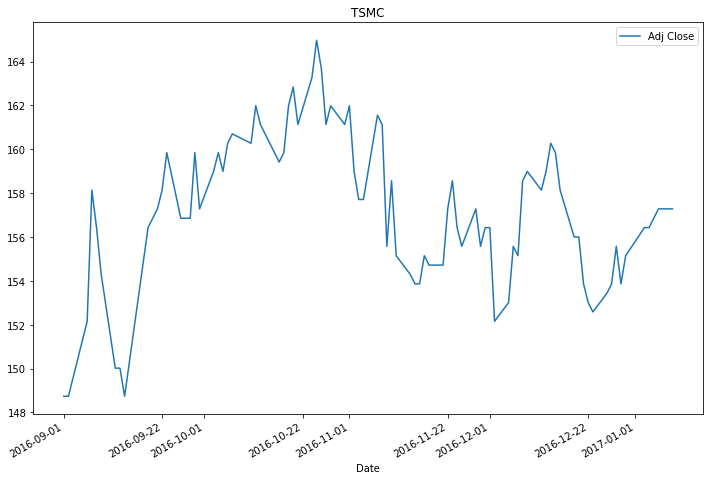

In [22]:
data['Adj Close'].plot(legend=True, figsize=(12,8), title='TSMC', label='Adj Close')

In [37]:
#!pip install quandl
import quandl
#quandl.ApiConfig.api.key = "YOURAPIKEY"
df = quandl.get("WIKI/AAPL", start_date="2017-01-01", end_date="2019-11-5")
df.to_csv('APPL.csv')
ReadAPPL=pd.read_csv('APPL.csv')
#ReadAPP.dtype()
ReadAPPL.tail()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
303,2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0
304,2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
305,2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
306,2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
307,2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0


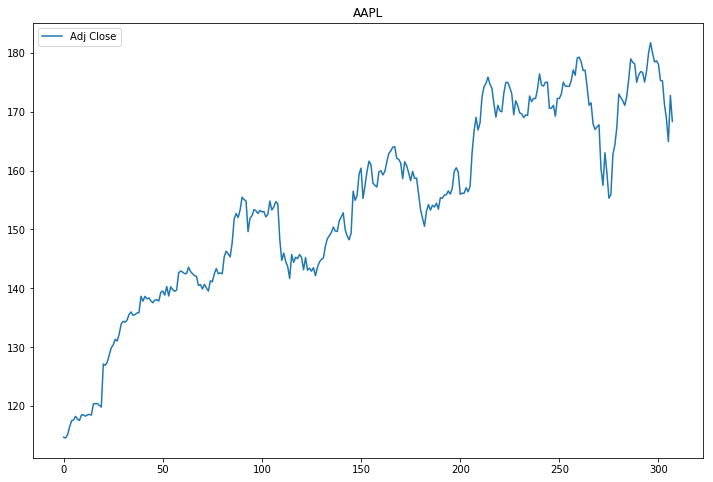

In [38]:
ReadAPPL['Adj. Close'].plot(legend=True, figsize=(12,8), title='AAPL', label='Adj Close')